In [1]:
from typing import TypedDict, Annotated
from operator import add
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

In [10]:
class State(TypedDict):
    foo: int

In [11]:
def node1(state): 
    print('----Node1----')
    return {'foo': state['foo'] + 1}

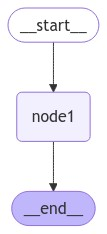

In [12]:
wflow = StateGraph(State)
wflow.add_node('node1',node1)
wflow.add_edge(START,'node1')
wflow.add_edge('node1',END)
graph = wflow.compile()
# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [13]:
graph.invoke({'foo': 1})

----Node1----


{'foo': 2}

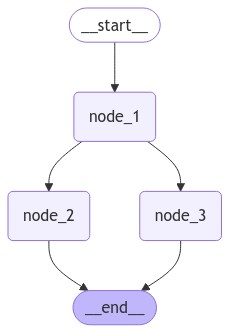

In [14]:
class State(TypedDict):
    foo: int

def node_1(state):
    print("---Node 1---")
    return {"foo": state['foo'] + 1}

def node_2(state):
    print("---Node 2---")
    return {"foo": state['foo'] + 1}

def node_3(state):
    print("---Node 3---")
    return {"foo": state['foo'] + 1}

# Build graph
builder = StateGraph(State)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)

# Logic
builder.add_edge(START, "node_1")
builder.add_edge("node_1", "node_2")
builder.add_edge("node_1", "node_3")
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [15]:
from langgraph.errors import InvalidUpdateError
try:
    graph.invoke({'foo': 1})
except InvalidUpdateError as e:
    print(f"InvalidUpdateError occurred: {e}")

---Node 1---
---Node 2---
---Node 3---
InvalidUpdateError occurred: At key 'foo': Can receive only one value per step. Use an Annotated key to handle multiple values.
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/INVALID_CONCURRENT_GRAPH_UPDATE


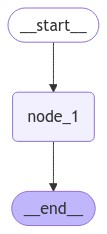

In [23]:
class State(TypedDict):
    foo: Annotated[list[int],add]

def node_1(state):
    print("---Node 1---")
    return {"foo": [state['foo'][0] + 1]}
    
# Build graph
builder = StateGraph(State)
builder.add_node("node_1", node_1)

# Logic
builder.add_edge(START, "node_1")
builder.add_edge("node_1", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [24]:
graph.invoke({'foo': [1]})

---Node 1---


{'foo': [1, 2]}

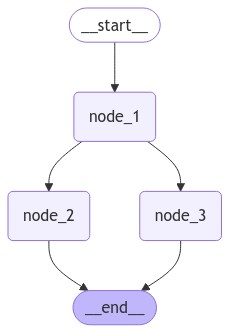

In [25]:
class State(TypedDict):
    foo: Annotated[list[int],add]

def node_1(state):
    print("---Node 1---")
    return {"foo": [state['foo'][-1] + 1]}

def node_2(state):
    print("---Node 2---")
    return {"foo": [state['foo'][-1] + 1]}

def node_3(state):
    print("---Node 3---")
    return {"foo": [state['foo'][-1] + 1]}

# Build graph
builder = StateGraph(State)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)

# Logic
builder.add_edge(START, "node_1")
builder.add_edge("node_1", "node_2")
builder.add_edge("node_1", "node_3")
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [26]:
graph.invoke({'foo': [1]})

---Node 1---
---Node 2---
---Node 3---


{'foo': [1, 2, 3, 3]}

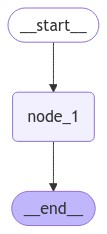

In [27]:
class State(TypedDict):
    foo: Annotated[list[int],add]

def node_1(state):
    print("---Node 1---")
    return {"foo": [state['foo'][0] + 1]}
    
# Build graph
builder = StateGraph(State)
builder.add_node("node_1", node_1)

# Logic
builder.add_edge(START, "node_1")
builder.add_edge("node_1", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [29]:
try:
    graph.invoke({'foo': None})
except TypeError as e:
    print(f"TypeError occurred: {e}")

TypeError occurred: can only concatenate list (not "NoneType") to list


In [43]:
def reduce_list(left: list | None, right: list | None):
    if not left: 
        left = []
    if not right: 
        right = []
    return left + right

In [44]:
class defaultState(TypedDict):
    foo: Annotated[list[int],add]

class customState(TypedDict): 
    foo: Annotated[list[int],reduce_list]

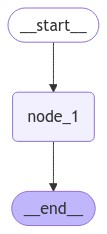

In [49]:
def node_1(state):
    print("---Node 1---")
    return {"foo": [2]}


# Build graph
# builder = StateGraph(defaultState)
builder = StateGraph(defaultState)
builder.add_node("node_1", node_1)

# Logic
builder.add_edge(START, "node_1")
builder.add_edge("node_1", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [50]:
try:
    graph.invoke({'foo': None})
except TypeError as e:
    print(f"TypeError occurred: {e}")

TypeError occurred: can only concatenate list (not "NoneType") to list


In [58]:
from langgraph.graph import MessagesState 
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages
from typing import TypedDict, Annotated

# Both are same
class CustomState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]
    add_key_1: str
    add_key_2: str

class State(MessagesState):
    add_key_1: str
    add_key_2: str

In [59]:
from langgraph.graph.message import add_messages
from langchain_core.messages import AIMessage, HumanMessage

# Initial state
initial_messages = [AIMessage(content="Hello! How can I assist you?", name="Model"),
                    HumanMessage(content="I'm looking for information on marine biology.", name="Lance")
                   ]

# New message to add
new_message = AIMessage(content="Sure, I can help with that. What specifically are you interested in?", name="Model")

# Test
add_messages(initial_messages , new_message)

[AIMessage(content='Hello! How can I assist you?', additional_kwargs={}, response_metadata={}, name='Model', id='bb37d618-69de-41ce-88d9-b91df0ae76c1'),
 HumanMessage(content="I'm looking for information on marine biology.", additional_kwargs={}, response_metadata={}, name='Lance', id='f1244997-e154-4691-9c3d-c5019e334e97'),
 AIMessage(content='Sure, I can help with that. What specifically are you interested in?', additional_kwargs={}, response_metadata={}, name='Model', id='60959dbf-ed26-4680-b398-000478b45b8a')]

In [60]:
# Initial state
initial_messages = [AIMessage(content="Hello! How can I assist you?", name="Model", id="1"),
                    HumanMessage(content="I'm looking for information on marine biology.", name="Lance", id="2")
                   ]

# New message to add
new_message = HumanMessage(content="I'm looking for information on whales, specifically", name="Lance", id="2")

# Test
add_messages(initial_messages , new_message)

[AIMessage(content='Hello! How can I assist you?', additional_kwargs={}, response_metadata={}, name='Model', id='1'),
 HumanMessage(content="I'm looking for information on whales, specifically", additional_kwargs={}, response_metadata={}, name='Lance', id='2')]

In [61]:
a = [1,2,3,40,50]
a[:-2]

[1, 2, 3]

In [67]:
from langchain_core.messages import RemoveMessage

# Message list
messages = [AIMessage("Hi.", name="Bot", id="1")]
messages.append(HumanMessage("Hi.", name="Lance", id="2"))
messages.append(AIMessage("So you said you were researching ocean mammals?", name="Bot", id="3"))
messages.append(HumanMessage("Yes, I know about whales. But what others should I learn about?", name="Lance", id="4"))

# Isolate messages to delete
# delete_messages = [RemoveMessage(id=m.id) for m in messages[:-2]]
# print(delete_messages)

In [77]:
new = []
for m in messages:
    if m.id not in ('1','2'):
        new.append(m)
print(new)

[AIMessage(content='So you said you were researching ocean mammals?', additional_kwargs={}, response_metadata={}, name='Bot', id='3'), HumanMessage(content='Yes, I know about whales. But what others should I learn about?', additional_kwargs={}, response_metadata={}, name='Lance', id='4')]


In [78]:
from langchain_core.messages import RemoveMessage

# Message list
messages = [AIMessage("Hi.", name="Bot", id="1")]
messages.append(HumanMessage("Hi.", name="Lance", id="2"))
messages.append(AIMessage("So you said you were researching ocean mammals?", name="Bot", id="3"))
messages.append(HumanMessage("Yes, I know about whales. But what others should I learn about?", name="Lance", id="4"))

# Isolate messages to delete
delete_messages = [RemoveMessage(id=m.id) for m in messages[:-2]]
print(delete_messages)

[RemoveMessage(content='', additional_kwargs={}, response_metadata={}, id='1'), RemoveMessage(content='', additional_kwargs={}, response_metadata={}, id='2')]


In [80]:
add_messages(messages , delete_messages)

[AIMessage(content='So you said you were researching ocean mammals?', additional_kwargs={}, response_metadata={}, name='Bot', id='3'),
 HumanMessage(content='Yes, I know about whales. But what others should I learn about?', additional_kwargs={}, response_metadata={}, name='Lance', id='4')]

In [81]:
print(messages)

[AIMessage(content='Hi.', additional_kwargs={}, response_metadata={}, name='Bot', id='1'), HumanMessage(content='Hi.', additional_kwargs={}, response_metadata={}, name='Lance', id='2'), AIMessage(content='So you said you were researching ocean mammals?', additional_kwargs={}, response_metadata={}, name='Bot', id='3'), HumanMessage(content='Yes, I know about whales. But what others should I learn about?', additional_kwargs={}, response_metadata={}, name='Lance', id='4')]


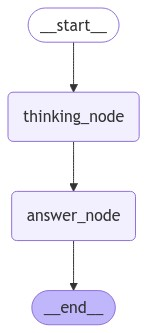

In [16]:
class OverallState(TypedDict):
    question: str
    answer: str
    notes: str

def thinking_node(state: OverallState):
    return {"answer": "bye", "notes": "... his is name is Lance"}

def answer_node(state: OverallState):
    return {"answer": "bye Lance"}

graph = StateGraph(OverallState)
graph.add_node("answer_node", answer_node)
graph.add_node("thinking_node", thinking_node)
graph.add_edge(START, "thinking_node")
graph.add_edge("thinking_node", "answer_node")
graph.add_edge("answer_node", END)

graph = graph.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [17]:
graph.invoke({"question":"hi"})

{'question': 'hi', 'answer': 'bye Lance', 'notes': '... his is name is Lance'}

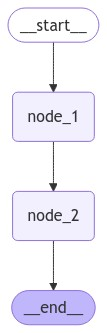

In [7]:
class OverallState(TypedDict):
    foo: int
class PrivateState(TypedDict):
    baz: int

def node_1(state:OverallState):
    print("---Node 1---")
    return {"baz": state['foo'] + 1}

def node_2(state: PrivateState):
    print("---Node 2---")
    return {"foo": state['baz'] + 1}

# Build graph
builder = StateGraph(OverallState)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)

# Logic
builder.add_edge(START, "node_1")
builder.add_edge("node_1", "node_2")
builder.add_edge("node_2", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [8]:
graph.invoke({'foo': 3})

---Node 1---
---Node 2---


{'foo': 5}

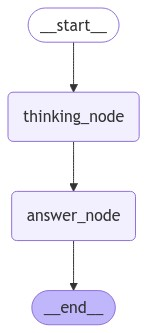

In [14]:
class OverallState(TypedDict):
    question: str
    notes: str
    answer: str

class InputState(TypedDict):
    question: str

class OutputState(TypedDict):
    answer: str

def thinking_node(state: InputState) -> OverallState:
    print('thinking _node')
    return {'question': state['question'], 'notes': '... this is Sandeep', 'answer': 'bye'}

def answer_node(state: OverallState) -> OutputState:
    print('answer_node')
    return {'answer': 'Bye Sandeep.'}

# Build graph
builder = StateGraph(OverallState, input=InputState, output=OutputState)
builder.add_node("thinking_node", thinking_node)
builder.add_node("answer_node", answer_node)

# Logic
builder.add_edge(START, "thinking_node")
builder.add_edge("thinking_node", "answer_node")
builder.add_edge("answer_node", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [15]:
graph.invoke({'question': 'Hi'})

thinking _node
answer_node


{'answer': 'Bye Sandeep.'}